## 1 site Non Hermitian Fermi Hubbard

In [41]:
from qiskit import QuantumCircuit
import scipy.linalg as la
import numpy as np
from qiskit.primitives import Estimator
from qiskit.quantum_info import Operator, SparsePauliOp
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal

H = SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],[-0.5+0.0375j,  0.-0.0375j,  0.-0.0375j,  0.5+0.0375j])

def VQA_1st_Step(theta, Er):
    
  ## theta contains Ei as first element
  Ei = theta[0]
  qc = ansatz.assign_parameters(theta[1:])
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er - 1j*Ei])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def VQA_2nd_Step(theta):
    
  ## theta contains Er and Ei as 1st two elements
  Er = theta[0] ; Ei = theta[1] 
  qc = ansatz.assign_parameters(theta[2:])
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er - 1j*Ei])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def get_energy(Er0, Ei0):
    
    x0 = np.random.random( len(ansatz.parameters) + 1 )

    x0[0] = Ei0

    result1 = minimize(lambda theta: VQA_1st_Step(theta,Er0), x0 = x0, method="BFGS") 

    x1 = np.concatenate(([Er0], result1.x))

    result2 = minimize(VQA_2nd_Step, x0 = x1, method="BFGS") 

    return [ result2.x[0], result2.x[1], result2.fun ]

ansatz = TwoLocal(H.num_qubits, ['ry', 'rz'], 'cz',reps=2)

get_energy(0.2,-1.5)

[np.float64(-8.098381874821481e-09),
 np.float64(-7.908792445463113e-08),
 np.float64(1.559882778501276e-11)]

In [42]:
import random
Er0 = -2.0
E_max = 1.0
delE = 0.5

Eset0 = []

while (Er0 < E_max):

    Ei0 = random.randint(1,5)
    print(Ei0)
    
    result0 = get_energy(Er0, Ei0)
    
    Er = result0[0]
    Ei = result0[1]
    
    if result0[2] < 1.0e-05:
        Eset0.append(Er+1j*Ei)
        print(Er + 1j*Ei)
        print('LOSS: ',result0[2])

    result1 = get_energy(Er0, -1.0*Ei0)

    Er = result1[0]
    Ei = result1[1]

    if result1[2] < 1.0e-05:
        Eset0.append(Er+1j*Ei)
        print(Er + 1j*Ei)
        print('LOSS: ',result1[2])

    Er0 += delE


4
(-2+0.14999993695277167j)
LOSS:  5.477100994966122e-10
(-2+0.15000098602573111j)
LOSS:  6.829303789146479e-11
3
(-1.5-8.069745603361441e-07j)
LOSS:  3.115807611919763e-11
(-1.5+7.101100136722291e-07j)
LOSS:  1.3141709942487978e-12
1
(-1.4999999916185545-2.075005832136546e-08j)
LOSS:  9.81992265280951e-13
(-1.4999999927099328-1.776544070026168e-08j)
LOSS:  8.118317129657271e-11
3
(-4.999750207790622e-05-2.3883360861034445e-07j)
LOSS:  4.436258582707353e-10
(-4.9997215383290605e-05-1.4743185265080864e-08j)
LOSS:  2.0354468110994617e-11
3
-8.693005491232544e-05j
LOSS:  5.594324170576925e-10
5.1897708035456025e-05j
LOSS:  2.2331323873414632e-09
3
(-1.1677949718347236e-09+1.3436313241024678e-07j)
LOSS:  4.125505492780235e-12
(5.0002094664658436e-05+3.827369953621263e-08j)
LOSS:  1.7891660375468632e-12


In [43]:
Eset = list(set([elem.round(3) for elem in Eset0]))
Erset = [elem.real for elem in Eset]
Eiset = [elem.imag for elem in Eset]

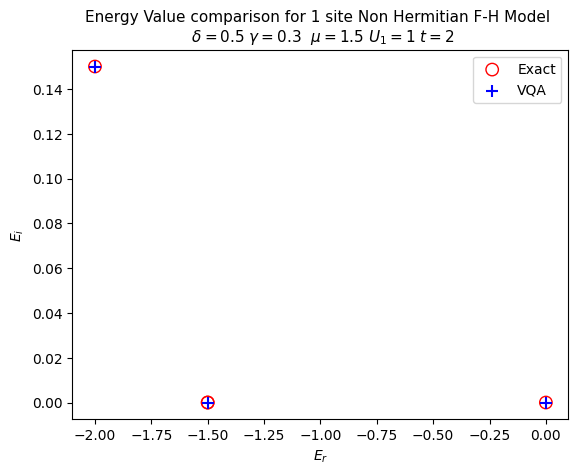

In [61]:
import matplotlib.pyplot as plt
plt.xlabel('$E_r$')
plt.ylabel('$E_i$')
plt.scatter(main.real,main.imag,s= 80, facecolors = 'none', edgecolor = 'r',label = 'Exact')
plt.scatter(Erset,Eiset,s=70,marker = '+',label='VQA',color='b')
plt.legend()
plt.title("Energy Value comparison for 1 site Non Hermitian F-H Model \n "+ r"$\delta = 0.5$ $\gamma = 0.3$  $\mu = 1.5$ $U_1 = 1$ $t = 2$", fontsize = 11)

plt.show()

In [46]:
main

array([ 0. +0.j  , -1.5+0.j  , -1.5+0.j  , -2. +0.15j])